# Projekt przejściowy 
## Analiza wzrostu zainteresowania mieszańcami pudla na przestrzeni lat 2004-2023

### Aleksandra Załęska, 06.2023r.

### Dlaczego wzrost zainteresowania jest problemem?

>Według FCI (Fédération Cynologique Internationale), czyli
Międzynarodowego Związku Kynologicznego rasy te nie są
uznawane, co skutkuje brakiem możliwości zare jestrowania dane j
hodowli.

>Zarejestrowanie hodowli i przestrzeganie wymogów hodowlanych
pomaga w utrzymaniu wysokiego standardu rasy i poprawia
genetyczną różnorodność psów. Ponadto, zare jestrowane
hodowle są zazwycza j regularnie sprawdzane pod kątem zdrowia
psów i przestrzegania reguł, co pozwala na szybszą reakcję w
przypadku jakichkolwiek problemów.

>Wzrost popularności ras psów nieuznanych przez FCI oraz brak
możliwości re jestracji hodowli przyczynia się w konsekwencji do
wzrostu liczby pseudohodowli i pozbawionych skrupułów
hodowców, dla których zysk jest ważnie jszy niż dobro psów.
Hodowcy często stosu ją złe praktyki hodowlane i nie
przeprowadza ją odpowiednie j soc jalizac ji i opieki nad
szczeniętami, co prowadzi do problemów zdrowotnych i
behawioralnych w późnie jszym życiu .

### Nasilony trend

>Odwrócenie trendu obecnie stanowi wyzwanie
ze względu na wysokie zainteresowanie tymi
rasami szczególnie wśród in fluencerów i
celebrytów. 

### Obszar analizy

>Analiza będzie obejmowała najpopularniejsze obecnie typy
mieszańców t j. Cavapoo, Goldendoodle, Maltipoo, Cockapoo,
Labradoodle, Bernedoodle, Cavoodle oraz Shih-Poo.

>Analiza ta jest tworzona w oparciu o dane z serwisu społecznościowego Twitter i używanych w postach hashtagów.

### Pozyskanie postów

Do pozyskania zbioru danych niezbędnych do naszej analizy wykorzystano bibliotekę `snscrape`. Poniżej kod umożliwiający scrapowanie treści tweetów zaawierających konkretny hashtag wraz z dokładną datą i godziną zamieszczenia posta. 

In [1]:
# pip install snscrape

In [2]:
# import snscrape.modules.twitter as sntwitter

In [3]:
import pandas as pd
import time

In [4]:
# Ustalamy hashtag, który chcemy scrapować
# hashtag = "#hashtag"

# Ustalamy czas oczekiwania 1 sekundy pomiędzy wysyłaniem żądań
# wait_time = 1

# Tworzymy listę, która będzie przechowywać zawartość tweetów
# tweets_list = []

# W tej pętli możemy ustalić zakres dat, z których będziemy zapisywać tweety 
# for tweet in sntwitter.TwitterSearchScraper(hashtag + " since:2004-01-01 until:2022-01-01").get_items():
#    tweets_list.append([tweet.date, tweet.content])
#    time.sleep(wait_time)

    # Wyświetlanie wiadomośći po wysłaniu żądania
    # print(f"Scraped tweet on {tweet.date} - waiting {wait_time}s before next request...")

# Tworzymy ramkę danych, która będzie przechowywać tweety
# tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Text'])

Ramkę danych pozyskanych z twittera zapisujemy w pliku CSV za pomocą poniższego kodu.

In [5]:
# tweets_df.to_csv('labradoodle.csv', index=False)

### Przetwarzanie i modelowanie danych

Z pomocą powyższego kodu pozyskano sześć ramek danych dla każdej z ras i zapisano w plikach CSV. Teraz możemy je wczytać:

In [6]:
bernedoodle = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTUciAMyurtYSdmVO1RUlYZBLLhktWgaEGi8vxZJCea_ays99o2Gc5WxdAWHY4EW0iLchJtNdQGvA0l/pub?gid=54723927&single=true&output=csv")
cavapoo = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTc0_G_Ui7IoQjqgEJtzWgu4nxYAgDPEbQuZSKHO4RkwygI4y2H4zWWv_TMuO7KVmg-uHdwRCi8xMYz/pub?gid=1455098290&single=true&output=csv")
cavoodle = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQd3-lDR4f65YHmpc1Vjghhxnn5yXvXrqLlijeny7ukShVG70_ipeDCr7wLhPEpgKQL4-ACgCCC0prR/pub?gid=1893569579&single=true&output=csv")
labradoodle = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQTT_UaEFzBffhAIi1hRTj-v3xAmLeKN6LruTrmB2AXKPAMqGOLgT9ob2k4V99QY1IO-kL9QzSGXG1c/pub?gid=519261864&single=true&output=csv")
maltipoo = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTGcDW-705l0pDEDPQJWaoyeb3tXvByj-vgo17NXnxL-znd-TbgfzQ02xP0a3SM_VkmvrEuo0x--j-d/pub?gid=1044172009&single=true&output=csv")
shihpoo = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTMnknPRkqMjVvearn81Wqytd-hZh4Uhmn1MY5B4jeGMASZUN3gROv0goyi91ShnCRXU_UQM1yKPLx2/pub?gid=938118459&single=true&output=csv")

Z powyższych ramek danych tworzymy nowe ramki przechowujące w jednej kolumnie datę, a w drugiej kolumnie liczbę postów z danym hashtagiem opublikowanych w danym dniu. 

Zaczynamy od stworzenia kopii powyższych ramek danych:

In [7]:
bernedoodle_only_date = bernedoodle
cavapoo_only_date = cavapoo
cavoodle_only_date = cavoodle
labradoodle_only_date = labradoodle
maltipoo_only_date = maltipoo
shihpoo_only_date = shihpoo

In [8]:
dfs = [bernedoodle_only_date, cavapoo_only_date, cavoodle_only_date, labradoodle_only_date, maltipoo_only_date, shihpoo_only_date]

for dataset in dfs:
    dataset['Datetime'] = pd.to_datetime(dataset['Datetime'], errors='coerce')
    dataset.dropna(inplace=True) 
    dataset['Date'] = dataset['Datetime'].dt.date  #Wyodrębniamy tylko datę dzienną i tworzymy nową kolumnę 'Date'
    dataset.drop(['Datetime','Text'], axis=1, inplace = True) # Usuwamy oryginalną colmnę 'Datetime'

In [9]:
def count_dates(df):
    # Grupujemy ramkę danych na podstawie daty i zliczamy ile razy dana data występuje
    counts = df.groupby('Date').size().reset_index(name='Count')
    # Zwracamy wynik funkcji
    return counts

In [10]:
bernedoodle_counts = count_dates(bernedoodle_only_date)
cavapoo_counts = count_dates(cavapoo_only_date)
cavoodle_counts = count_dates(cavoodle_only_date)
labradoodle_counts = count_dates(labradoodle_only_date)
maltipoo_counts = count_dates(maltipoo_only_date)
shihpoo_counts = count_dates(shihpoo_only_date)

Nowe ramki danych ponowanie zapisujemy w plikach CSV:

In [11]:
# bernedoodle_counts.to_csv('bernedoodle_counts.csv', index=False)
# cavapoo_counts.to_csv('cavapoo_counts.csv', index=False)
# cavoodle_counts.to_csv('cavoodle_counts.csv', index=False)
# labradoodle_counts.to_csv('labradoodle_counts.csv', index=False)
# maltipoo_counts.to_csv('maltipoo_counts.csv', index=False)
# shihpoo_counts.to_csv('shihpoo_counts.csv', index=False)

Zmieniamy nazwy kolumn na unikalne:

In [12]:
bernedoodle_counts = bernedoodle_counts.rename(columns={'Count': 'Bernedoodle_Count'})
cavapoo_counts = cavapoo_counts.rename(columns={'Count': 'Cavapoo_Count'})
cavoodle_counts = cavoodle_counts.rename(columns={'Count': 'Cavoodle_Count'})
labradoodle_counts = labradoodle_counts.rename(columns={'Count': 'Labradoodle_Count'})
maltipoo_counts = maltipoo_counts.rename(columns={'Count': 'Maltipoo_Count'})
shihpoo_counts = shihpoo_counts.rename(columns={'Count': 'Shihpoo_Count'})

Aby połączyć dane z sześcu tabel w jednej tabeli, tworzymy nową ramkę i wypełniamy ją datami od 2004-01-01 do 2022-01-01:

In [13]:
import datetime

In [14]:
# Tworzymy listę dat od 01-01-2004 do 01-01-2023
start_date = datetime.date(2004, 1, 1)
end_date = datetime.date(2023, 1, 1)
delta = datetime.timedelta(days=1)
dates = []
while start_date < end_date:
    dates.append(start_date)
    start_date += delta

# Tworzymy ramkę danych 
calendar = pd.DataFrame({'Date': dates})

Łączymy dane z sześciu tabel przy pomocy kolumny 'Date' i zapisujemy jako *doodles*:




In [15]:
doodles = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(bernedoodle_counts, cavapoo_counts, on='Date', how='outer'), cavoodle_counts, on='Date', how='outer'), labradoodle_counts, on='Date', how='outer'), maltipoo_counts, on='Date', how='outer'), shihpoo_counts, on='Date', how='outer')

Teraz do ramki doodles dołączamy ramkę calendar na podstawie kolumny 'Date':

In [16]:
doodles = pd.merge(calendar, doodles, on='Date', how='outer')

Nasze dane znalazły się już w jednej tableli, jednakże możemy zauważyć, że w tabeli występują wartości NaN. Aby uniknąć problemów w dalszej analizie w związku z występowaniem tych wartości, wszystkie wartości NaN możemy zmienić na 0.

In [17]:
doodles = doodles.fillna(0)

Możemy także zmienić typ danych w kolumnach zawierających informację o ilości postów w danym dniu na integer:

In [18]:
doodles[['Bernedoodle_Count', 'Cavapoo_Count', 'Cavoodle_Count', 'Labradoodle_Count', 'Maltipoo_Count', 'Shihpoo_Count']] = doodles[['Bernedoodle_Count', 'Cavapoo_Count', 'Cavoodle_Count', 'Labradoodle_Count', 'Maltipoo_Count', 'Shihpoo_Count']].astype(int)

## Wizualizacje wzrostów zainteresowania poszczególnymi rasami

Do stworzenia wykresów potrzebujemy biblioteki `matplotlib`:

In [19]:
import matplotlib.pyplot as plt
import datetime as dt

Aby zminimalizować liczbę linijek kodu, stworzymy funkcję rysującą wykres, którą wykorzystamy dla każdej rasy.

In [20]:
def draw_bar_plot(dataframe):
  plt.figure(figsize=(10,6))
  plt.bar(doodles['Date'], doodles[f'{dataframe}'], width=1.0)
  start_date = dt.datetime.strptime('2004-01-01', '%Y-%m-%d')
  end_date = dt.datetime.strptime('2023-01-01', '%Y-%m-%d')
  plt.xlim(start_date, end_date)
  plt.xlabel('Date')
  plt.ylabel('Count')
  plt.title(f'Bar Plot of {dataframe}')
  plt.show()

### Bernedoodle

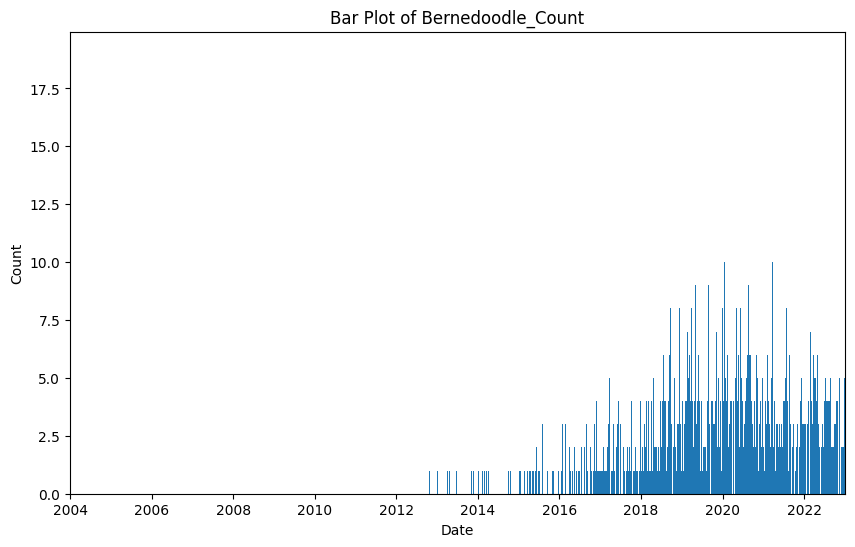

In [21]:
draw_bar_plot('Bernedoodle_Count')

### Cavapoo

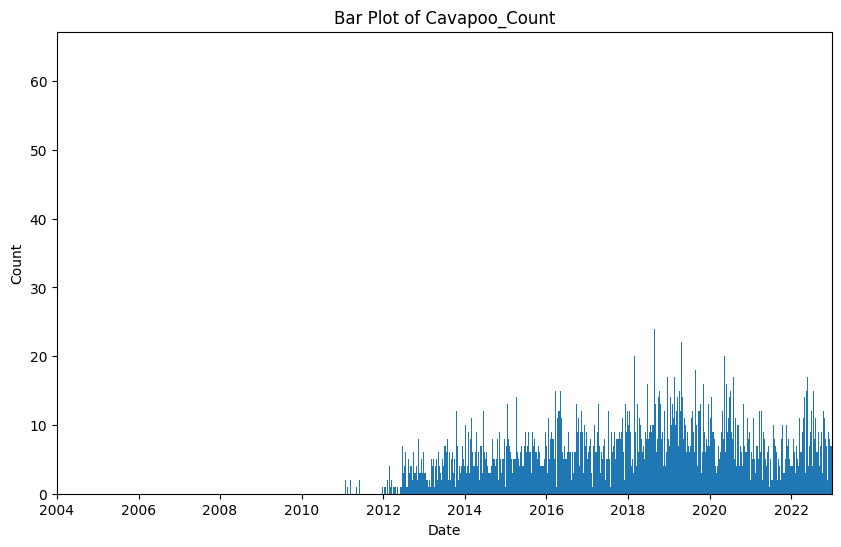

In [22]:
draw_bar_plot('Cavapoo_Count')

### Cavoodle

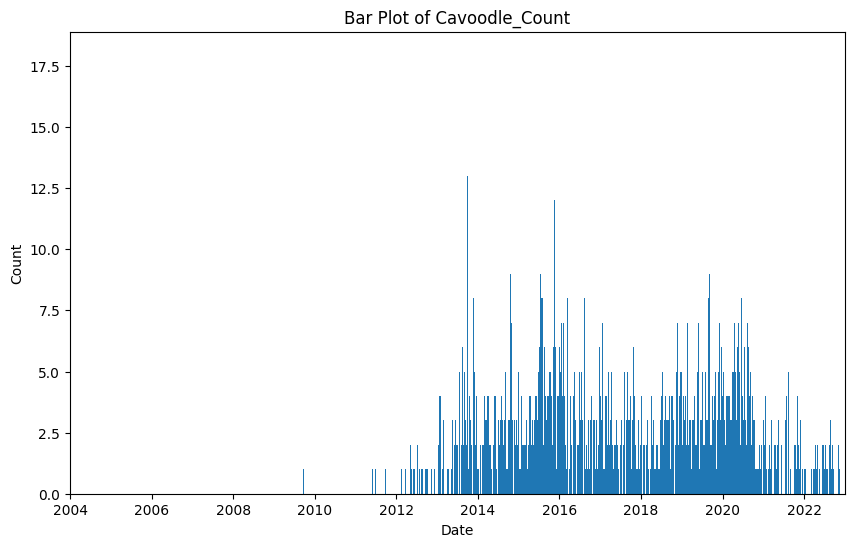

In [23]:
draw_bar_plot('Cavoodle_Count')

### Labradoodle

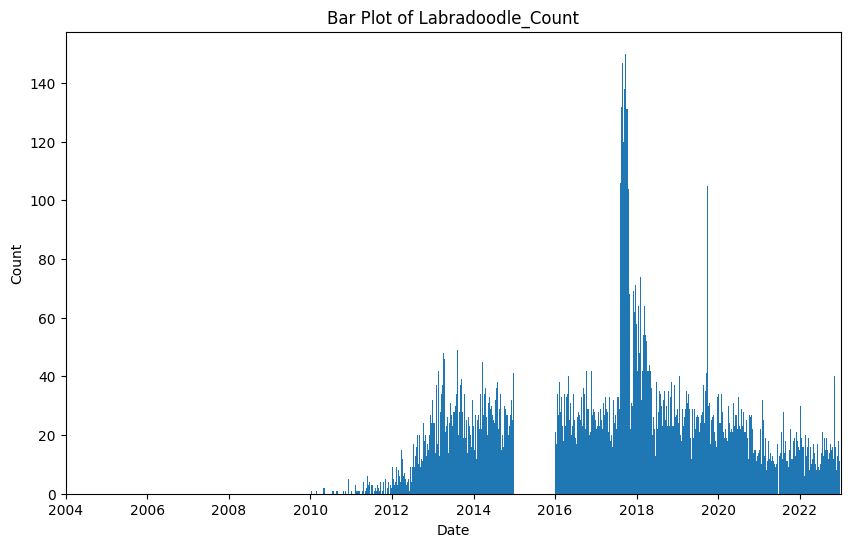

In [24]:
draw_bar_plot('Labradoodle_Count')

### Maltipoo

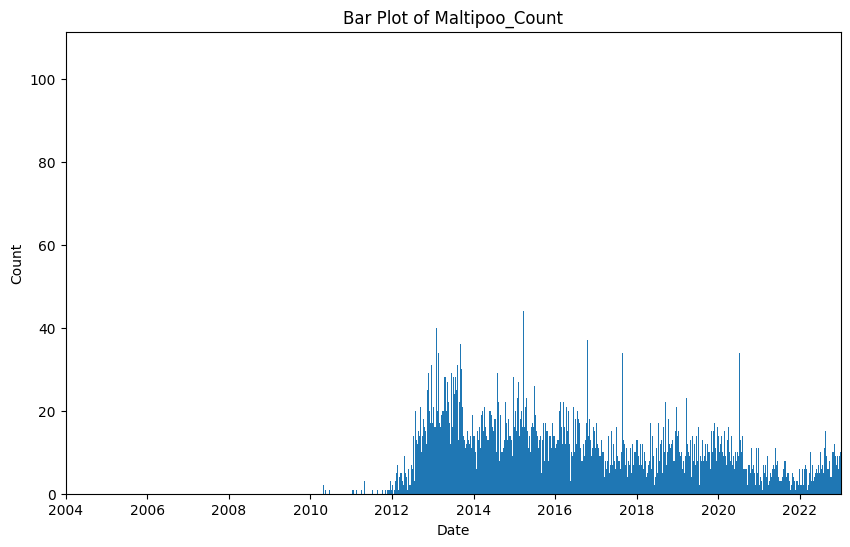

In [25]:
draw_bar_plot('Maltipoo_Count')

### Shihpoo

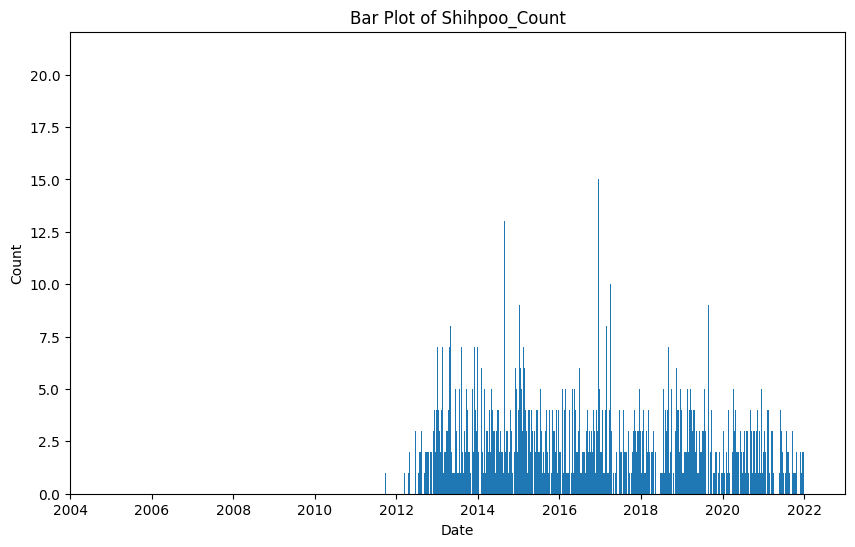

In [26]:
draw_bar_plot('Shihpoo_Count')

>Podsumowanie

>W przypadku każdej rasy możemy powiedzieć, że w ciągu około ostatnich 10 lat, zainteresowanie społeczeństwa wzrosło.

## Analiza sentymentu

Ponownie ładujemy dane z plików CSV:

In [27]:
bernedoodle = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTUciAMyurtYSdmVO1RUlYZBLLhktWgaEGi8vxZJCea_ays99o2Gc5WxdAWHY4EW0iLchJtNdQGvA0l/pub?gid=54723927&single=true&output=csv")
cavapoo = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTc0_G_Ui7IoQjqgEJtzWgu4nxYAgDPEbQuZSKHO4RkwygI4y2H4zWWv_TMuO7KVmg-uHdwRCi8xMYz/pub?gid=1455098290&single=true&output=csv")
cavoodle = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQd3-lDR4f65YHmpc1Vjghhxnn5yXvXrqLlijeny7ukShVG70_ipeDCr7wLhPEpgKQL4-ACgCCC0prR/pub?gid=1893569579&single=true&output=csv")
labradoodle = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQTT_UaEFzBffhAIi1hRTj-v3xAmLeKN6LruTrmB2AXKPAMqGOLgT9ob2k4V99QY1IO-kL9QzSGXG1c/pub?gid=519261864&single=true&output=csv")
maltipoo = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTGcDW-705l0pDEDPQJWaoyeb3tXvByj-vgo17NXnxL-znd-TbgfzQ02xP0a3SM_VkmvrEuo0x--j-d/pub?gid=1044172009&single=true&output=csv")
shihpoo = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTMnknPRkqMjVvearn81Wqytd-hZh4Uhmn1MY5B4jeGMASZUN3gROv0goyi91ShnCRXU_UQM1yKPLx2/pub?gid=938118459&single=true&output=csv")

Analizę sentymentu rozpoczynamy od czyszczenia kolumny '`Text`'. W tym celu instalujemy bibliotekę `re`:

In [28]:
import re

Dalej tworzymy funkcję czyszczącą kolumny '`Text`':

In [29]:
def clean_content(df):
    # Usuwanie linków
    df['Text'] = df['Text'].str.replace(r'http\S+|www.\S+', '', regex=True)

    # Usuwanie emotikon
    df['Text'] = df['Text'].str.replace(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', '', regex=True)

    # Usuwanie znaków specjalnych
    df['Text'] = df['Text'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

    # Usuwanie symboli nowej linii
    df['Text'] = df['Text'].str.replace(r'\n', ' ', regex=True)

    # Konwertowanie treści do małej czcionki
    df['Text'] = df['Text'].str.lower()

    # Usuwanie zbędnych spacji
    df['Text'] = df['Text'].str.strip()

    return df

Za pomocą powyższej funkcji czyścimy nasze ramki danych:

In [30]:
bernedoodle = clean_content(bernedoodle)
cavapoo = clean_content(cavapoo)
cavoodle = clean_content(cavoodle)
labradoodle = clean_content(labradoodle)
maltipoo = clean_content(maltipoo)
shihpoo = clean_content(shihpoo)

In [31]:
print(labradoodle)

                        Datetime  \
0      2022-12-30 20:37:34+00:00   
1      2022-12-30 20:30:00+00:00   
2      2022-12-30 19:44:11+00:00   
3      2022-12-30 17:55:06+00:00   
4      2022-12-30 16:59:34+00:00   
...                          ...   
98223  2009-05-24 01:58:47+00:00   
98224  2009-05-24 01:58:01+00:00   
98225  2009-05-19 08:16:33+00:00   
98226  2009-04-06 00:10:32+00:00   
98227  2009-01-23 18:00:36+00:00   

                                                    Text  
0      vetday labradoodle doodlesofinstagram  animal ...  
1      furryfriday  toys toy toycollection toyworld t...  
2      its been ages since ive posted any of my creat...  
3      our girl is 13 years old today labradoodle dog...  
4      hilohichado looks like her but this dog is a 4...  
...                                                  ...  
98223  oh and then maddie apparently drank all of the...  
98224  we came home today to find a guilty looking la...  
98225  damn crap weather out there  

W celu przygotowania analizy sentymentu potrzebujemy nowych modułów:

In [32]:
import nltk    #biblioteka do przetwarzania języka naturalnego
from nltk.sentiment import SentimentIntensityAnalyzer #moduł do analizy sentymentu

W kolejnym kroku pobieramy korpus `NLTK` przy użyciu funkcji `nltk.download()`:

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Kilka słów o korpusie Vader Lexicon:

>VADER (Valence Aware Dictionary and Sentiment Reasoner) to leksykon i narzędzie do analizy sentymentu oparte na regułach, które są dostosowane w szczególności do nastrojów i emocji wyrażanych w mediach społecznościowych.

>Dokumentację leksykonu i algorytmu można znaleźć w oryginalnej implementacji: https://github.com/cjhutto/vaderSentiment

W kolejnym kroku tworzymy funkcję:

> Funkcja `perform_sentiment_analysis()` pobiera ramkę danych jako dane wejściowe, dodaje dwie nowe kolumny: '`sentiment_score`' i '`sentiment`'. Wyniki sentymentu wahają się od -1 (sentyment negatywny) do 1 (sentyment pozytywny).

> Kolumna "`sentiment_score`" przechowuje wynik sentymentu dla każdego tweeta, podczas gdy kolumna "`sentiment`" klasyfikuje sentyment jako "Pozytywny", "Negatywny" lub "Neutralny" na podstawie wyniku sentymentu.

In [34]:
def perform_sentiment_analysis(df):
    sid = SentimentIntensityAnalyzer()

    # Zmieniamy typ kolumny 'Text' na typ string
    df['Text'] = df['Text'].astype(str)

    # Dodajemy nową kolumnę, w której będziemy umieszczać wyniki sentymentu
    df['sentiment_score'] = df['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

    # W kolumnie 'sentiment' klasyfikujemy sentyment na podstawie wyniku sentymentu, do trzech kategorii
    df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

    return df

>Ponownie tworzymy funkcję, która pozwoli nam oszczedzić kilka linijek kodu. Funkcja `draw_pie_chart` pozwoli nam rysować wykres kołowy, który będzie przedstawiać rozkład sentymentów w okół każdej z ras.

In [35]:
def draw_pie_chart(df):
    sentiment_counts = df['sentiment'].value_counts()
    labels = sentiment_counts.index.tolist()
    sizes = sentiment_counts.values.tolist()

    # Tworzenie wykresu kołowego
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    # Dodajemy tytuł
    plt.title('Rozkład sentymentu')

    # Ustalamy równe proporcje dla koła
    plt.axis('equal')

    # Wyświetlanie wykresu
    plt.show()

## Analiza sentymentu - Bernedoodle

In [36]:
bernedoodle_sent_analysis = perform_sentiment_analysis(bernedoodle)

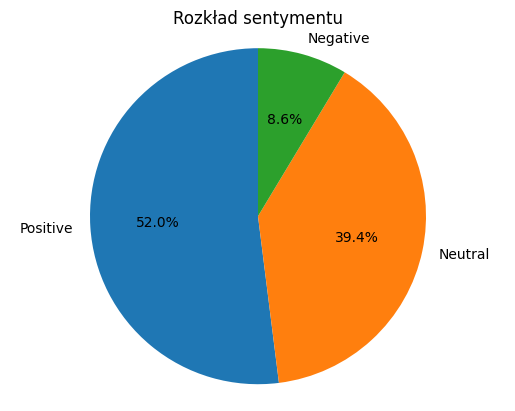

In [37]:
draw_pie_chart(bernedoodle_sent_analysis)

## Analiza sentymentu - Cavapoo

In [38]:
cavapoo_sent_analysis = perform_sentiment_analysis(cavapoo)

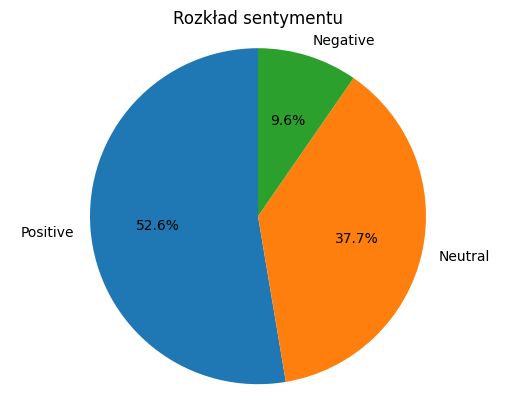

In [39]:
draw_pie_chart(cavapoo_sent_analysis)

## Analiza sentymentu - Cavoodle

In [40]:
cavoodle_sent_analysis = perform_sentiment_analysis(cavoodle)

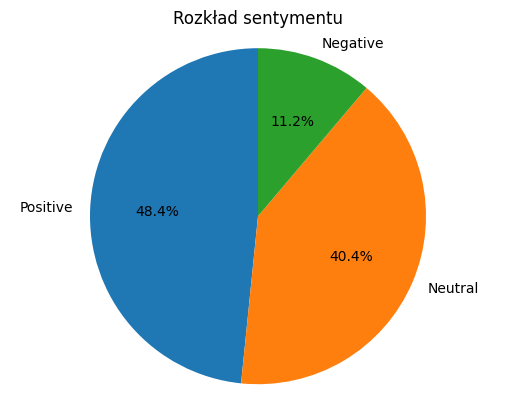

In [41]:
draw_pie_chart(cavoodle_sent_analysis)

## Analiza sentymentu - Labradoodle

In [42]:
labradoodle_sent_analysis = perform_sentiment_analysis(labradoodle)

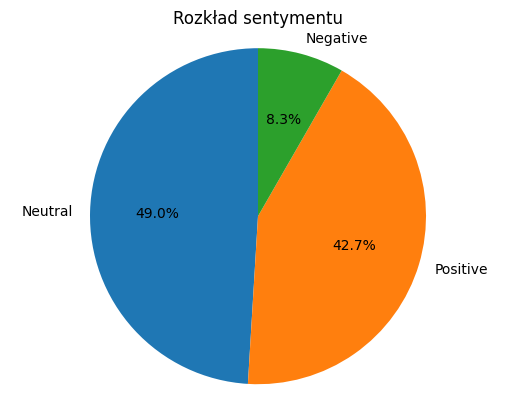

In [43]:
draw_pie_chart(labradoodle_sent_analysis)

## Analiza sentymentu - Maltipoo

In [44]:
maltipoo_sent_analysis = perform_sentiment_analysis(maltipoo)

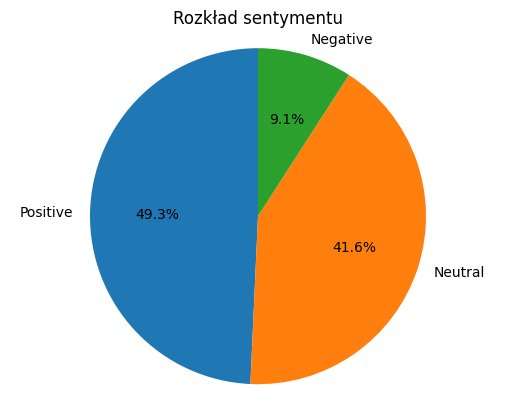

In [45]:
draw_pie_chart(maltipoo_sent_analysis)

## Analiza sentymentu - Shihpoo

In [46]:
shihpoo_sent_analysis = perform_sentiment_analysis(shihpoo)

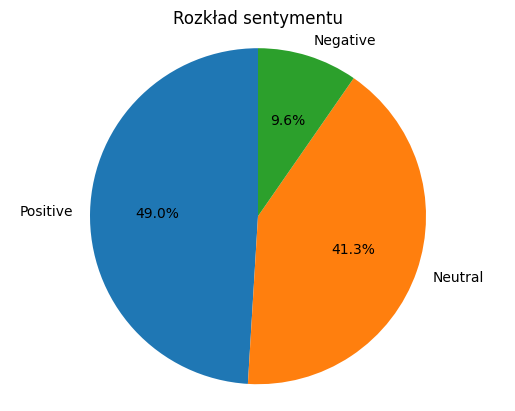

In [47]:
draw_pie_chart(shihpoo_sent_analysis)

>Podsumowanie

>W przypadku każdej rasy, rozkład sentymentu wygląda bardzo podobnie tj. około 50% tweetów miało pozytywny wydźwięk, około 40% neutralny oraz około 10% negatywny.

## Podsumowanie analizy

>Powyższa analiza utwierdziła hipotezę o tym, iż można zauważyć rosnące zainteresowanie mieszańcami pudli wśród społeczeństwa na przestrzeni ostatnich lat.

>Biorąc pod uwagę wyniki analizy sentymentu, możemy wyciągnąć kolejne niepokojące wnioski tzn., że społeczeństwo nie dostrzega problemu zwiazanego z nierejestrowanymi hodowlami psów, a psy pochodzące z nielegalnych hodowli stale cieszą się popularnością.